In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
train_df=pd.read_csv('train_data.csv')
validation_df=pd.read_csv('validation_data.csv')
test_df=pd.read_csv('test_data.csv')
promotion_df=pd.read_csv('promotion_data.csv')

In [5]:
train_df.head()

,CategoryCode,ItemCode,DateID,DailySales
0,category_2,1071115,12/19/2021,1
1,category_4,210652,2/13/2022,1
2,category_2,877624,12/19/2021,1
3,category_1,371104,12/19/2021,3
4,category_1,1090294,12/19/2021,3


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20651 entries, 0 to 20650
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CategoryCode  20651 non-null  object
 1   ItemCode      20651 non-null  int64 
 2   DateID        20651 non-null  object
 3   DailySales    20651 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 645.5+ KB


In [7]:
train_df['CategoryNo']=train_df['CategoryCode'].map({'category_1':1,'category_2': 2,'category_3':3,'category_4':4})
train_df.head()

,CategoryCode,ItemCode,DateID,DailySales,CategoryNo
0,category_2,1071115,12/19/2021,1,2
1,category_4,210652,2/13/2022,1,4
2,category_2,877624,12/19/2021,1,2
3,category_1,371104,12/19/2021,3,1
4,category_1,1090294,12/19/2021,3,1


In [8]:
from datetime import datetime

s1=[]


for i in train_df['DateID']:
  d1=datetime.strptime(i, '%m/%d/%Y')
  s1.append(d1)

d1 = pd.Series(s1,name='date')

d1

0       2021-12-19
1       2022-02-13
2       2021-12-19
3       2021-12-19
4       2021-12-19
           ...    
20646   2021-10-12
20647   2021-10-12
20648   2021-10-12
20649   2021-10-12
20650   2021-10-12
Name: date, Length: 20651, dtype: datetime64[ns]

In [9]:
train_df=pd.concat([train_df, d1], axis=1)
train_df.head()

,CategoryCode,ItemCode,DateID,DailySales,CategoryNo,date
0,category_2,1071115,12/19/2021,1,2,2021-12-19
1,category_4,210652,2/13/2022,1,4,2022-02-13
2,category_2,877624,12/19/2021,1,2,2021-12-19
3,category_1,371104,12/19/2021,3,1,2021-12-19
4,category_1,1090294,12/19/2021,3,1,2021-12-19


In [10]:
from datetime import date
s_date=datetime.strptime('10/01/2021', '%m/%d/%Y')
s_date=s_date.date()
s_date

weeks_no=[]
for i in train_df['date']:
  da=((i.date()-s_date).days)//7
  da=da+1
  weeks_no.append(da)

d2 = pd.Series(weeks_no,name='Week')
train_df=pd.concat([train_df, d2], axis=1)
train_df.head()

,CategoryCode,ItemCode,DateID,DailySales,CategoryNo,date,Week
0,category_2,1071115,12/19/2021,1,2,2021-12-19,12
1,category_4,210652,2/13/2022,1,4,2022-02-13,20
2,category_2,877624,12/19/2021,1,2,2021-12-19,12
3,category_1,371104,12/19/2021,3,1,2021-12-19,12
4,category_1,1090294,12/19/2021,3,1,2021-12-19,12


In [11]:
train_df['WeeklySales']=train_df.groupby(['CategoryNo','ItemCode','Week'])['DailySales'].transform(sum)
train_df

,CategoryCode,ItemCode,DateID,DailySales,CategoryNo,date,Week,WeeklySales
0,category_2,1071115,12/19/2021,1,2,2021-12-19,12,2
1,category_4,210652,2/13/2022,1,4,2022-02-13,20,8
2,category_2,877624,12/19/2021,1,2,2021-12-19,12,32
3,category_1,371104,12/19/2021,3,1,2021-12-19,12,11
4,category_1,1090294,12/19/2021,3,1,2021-12-19,12,14
...,...,...,...,...,...,...,...,...
20646,category_1,36898,10/12/2021,1,1,2021-10-12,2,37
20647,category_2,111436,10/12/2021,1,2,2021-10-12,2,10
20648,category_2,815101,10/12/2021,4,2,2021-10-12,2,15
20649,category_3,1064572,10/12/2021,1,3,2021-10-12,2,7


In [12]:
train_df['year']= train_df['date'].dt.year
train_df['month']= train_df['date'].dt.month
train_df['week_of_year'] = train_df['date'].dt.week

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
train_df.head()

,CategoryCode,ItemCode,DateID,DailySales,CategoryNo,date,Week,WeeklySales,year,month,week_of_year
0,category_2,1071115,12/19/2021,1,2,2021-12-19,12,2,2021,12,50
1,category_4,210652,2/13/2022,1,4,2022-02-13,20,8,2022,2,6
2,category_2,877624,12/19/2021,1,2,2021-12-19,12,32,2021,12,50
3,category_1,371104,12/19/2021,3,1,2021-12-19,12,11,2021,12,50
4,category_1,1090294,12/19/2021,3,1,2021-12-19,12,14,2021,12,50


In [14]:
train_df.duplicated(subset=['CategoryNo','ItemCode','Week','WeeklySales','month','year','week_of_year']).sum()

12760

In [15]:
train_df.loc[train_df.duplicated(subset=['CategoryNo','ItemCode','Week','WeeklySales'],keep=False), :]

,CategoryCode,ItemCode,DateID,DailySales,CategoryNo,date,Week,WeeklySales,year,month,week_of_year
0,category_2,1071115,12/19/2021,1,2,2021-12-19,12,2,2021,12,50
1,category_4,210652,2/13/2022,1,4,2022-02-13,20,8,2022,2,6
2,category_2,877624,12/19/2021,1,2,2021-12-19,12,32,2021,12,50
3,category_1,371104,12/19/2021,3,1,2021-12-19,12,11,2021,12,50
4,category_1,1090294,12/19/2021,3,1,2021-12-19,12,14,2021,12,50
...,...,...,...,...,...,...,...,...,...,...,...
20646,category_1,36898,10/12/2021,1,1,2021-10-12,2,37,2021,10,41
20647,category_2,111436,10/12/2021,1,2,2021-10-12,2,10,2021,10,41
20648,category_2,815101,10/12/2021,4,2,2021-10-12,2,15,2021,10,41
20649,category_3,1064572,10/12/2021,1,3,2021-10-12,2,7,2021,10,41


In [16]:
train=train_df[['CategoryNo','ItemCode','Week','WeeklySales','year','month','week_of_year']]
train.drop_duplicates(keep='first',inplace=True)
train

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,CategoryNo,ItemCode,Week,WeeklySales,year,month,week_of_year
0,2,1071115,12,2,2021,12,50
1,4,210652,20,8,2022,2,6
2,2,877624,12,32,2021,12,50
3,1,371104,12,11,2021,12,50
4,1,1090294,12,14,2021,12,50
...,...,...,...,...,...,...,...
20577,1,59047,2,6,2021,10,41
20579,2,50785,2,11,2021,10,41
20590,2,999403,2,6,2021,10,41
20597,3,1081087,2,15,2021,10,41


In [17]:
train=train.reset_index(drop=True)
train

,CategoryNo,ItemCode,Week,WeeklySales,year,month,week_of_year
0,2,1071115,12,2,2021,12,50
1,4,210652,20,8,2022,2,6
2,2,877624,12,32,2021,12,50
3,1,371104,12,11,2021,12,50
4,1,1090294,12,14,2021,12,50
...,...,...,...,...,...,...,...
7886,1,59047,2,6,2021,10,41
7887,2,50785,2,11,2021,10,41
7888,2,999403,2,6,2021,10,41
7889,3,1081087,2,15,2021,10,41


In [18]:
promotion_df.head()

,ItemCode,PromotionStartDate,PromotionEndDate,DiscountValue,DiscountType,SellingPrice
0,379249,12/3/2021,12/9/2021,10,Percentage,70
1,1066570,11/19/2021,11/25/2021,15,Percentage,45
2,124954,10/29/2021,11/4/2021,15,Percentage,210
3,35530,10/22/2021,10/28/2021,15,Percentage,60
4,1013335,1/21/2022,1/27/2022,10,Percentage,210


In [19]:
s1=[]


for i in promotion_df['PromotionStartDate']:
  d1=datetime.strptime(i, '%m/%d/%Y')
  s1.append(d1)

d1 = pd.Series(s1,name='PromotionStart')

s2=[]
for i in promotion_df['PromotionEndDate']:
  d2=datetime.strptime(i, '%m/%d/%Y')
  s2.append(d2)

d2 = pd.Series(s2,name='PromotionEnd')



In [20]:
promotion_df=pd.concat([promotion_df, d1,d2], axis=1)
promotion_df.head()

,ItemCode,PromotionStartDate,PromotionEndDate,DiscountValue,DiscountType,SellingPrice,PromotionStart,PromotionEnd
0,379249,12/3/2021,12/9/2021,10,Percentage,70,2021-12-03,2021-12-09
1,1066570,11/19/2021,11/25/2021,15,Percentage,45,2021-11-19,2021-11-25
2,124954,10/29/2021,11/4/2021,15,Percentage,210,2021-10-29,2021-11-04
3,35530,10/22/2021,10/28/2021,15,Percentage,60,2021-10-22,2021-10-28
4,1013335,1/21/2022,1/27/2022,10,Percentage,210,2022-01-21,2022-01-27


In [21]:
s_date=datetime.strptime('10/01/2021', '%m/%d/%Y')
s_date=s_date.date()
s_date

weeks_no=[]
for i in promotion_df['PromotionStart']:
  da=((i.date()-s_date).days)//7
  da=da+1
  weeks_no.append(da)

d3 = pd.Series(weeks_no,name='Week')
promotion_df=pd.concat([promotion_df, d3], axis=1)
promotion_df.head()

,ItemCode,PromotionStartDate,PromotionEndDate,DiscountValue,DiscountType,SellingPrice,PromotionStart,PromotionEnd,Week
0,379249,12/3/2021,12/9/2021,10,Percentage,70,2021-12-03,2021-12-09,10
1,1066570,11/19/2021,11/25/2021,15,Percentage,45,2021-11-19,2021-11-25,8
2,124954,10/29/2021,11/4/2021,15,Percentage,210,2021-10-29,2021-11-04,5
3,35530,10/22/2021,10/28/2021,15,Percentage,60,2021-10-22,2021-10-28,4
4,1013335,1/21/2022,1/27/2022,10,Percentage,210,2022-01-21,2022-01-27,17


In [22]:
promotion_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ItemCode            314 non-null    int64         
 1   PromotionStartDate  314 non-null    object        
 2   PromotionEndDate    314 non-null    object        
 3   DiscountValue       314 non-null    int64         
 4   DiscountType        314 non-null    object        
 5   SellingPrice        314 non-null    int64         
 6   PromotionStart      314 non-null    datetime64[ns]
 7   PromotionEnd        314 non-null    datetime64[ns]
 8   Week                314 non-null    int64         
dtypes: datetime64[ns](2), int64(4), object(3)
memory usage: 22.2+ KB


In [23]:
result = pd.merge(train,promotion_df, how="left", on=["ItemCode", "Week"])

In [24]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7891 entries, 0 to 7890
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   CategoryNo          7891 non-null   int64         
 1   ItemCode            7891 non-null   int64         
 2   Week                7891 non-null   int64         
 3   WeeklySales         7891 non-null   int64         
 4   year                7891 non-null   int64         
 5   month               7891 non-null   int64         
 6   week_of_year        7891 non-null   int64         
 7   PromotionStartDate  560 non-null    object        
 8   PromotionEndDate    560 non-null    object        
 9   DiscountValue       560 non-null    float64       
 10  DiscountType        560 non-null    object        
 11  SellingPrice        560 non-null    float64       
 12  PromotionStart      560 non-null    datetime64[ns]
 13  PromotionEnd        560 non-null    datetime64[n

In [25]:
result.drop(['PromotionStartDate','PromotionEndDate'],axis=1,inplace=True)

In [26]:
result

,CategoryNo,ItemCode,Week,WeeklySales,year,month,week_of_year,DiscountValue,DiscountType,SellingPrice,PromotionStart,PromotionEnd
0,2,1071115,12,2,2021,12,50,NaN,NaN,NaN,NaT,NaT
1,4,210652,20,8,2022,2,6,NaN,NaN,NaN,NaT,NaT
2,2,877624,12,32,2021,12,50,NaN,NaN,NaN,NaT,NaT
3,1,371104,12,11,2021,12,50,NaN,NaN,NaN,NaT,NaT
4,1,1090294,12,14,2021,12,50,NaN,NaN,NaN,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...
7886,1,59047,2,6,2021,10,41,NaN,NaN,NaN,NaT,NaT
7887,2,50785,2,11,2021,10,41,NaN,NaN,NaN,NaT,NaT
7888,2,999403,2,6,2021,10,41,NaN,NaN,NaN,NaT,NaT
7889,3,1081087,2,15,2021,10,41,NaN,NaN,NaN,NaT,NaT


In [27]:
result[['DiscountValue','DiscountType','SellingPrice']]=result[['DiscountValue','DiscountType','SellingPrice']].replace(np.NaN,0)
result

,CategoryNo,ItemCode,Week,WeeklySales,year,month,week_of_year,DiscountValue,DiscountType,SellingPrice,PromotionStart,PromotionEnd
0,2,1071115,12,2,2021,12,50,0.0,0,0.0,NaT,NaT
1,4,210652,20,8,2022,2,6,0.0,0,0.0,NaT,NaT
2,2,877624,12,32,2021,12,50,0.0,0,0.0,NaT,NaT
3,1,371104,12,11,2021,12,50,0.0,0,0.0,NaT,NaT
4,1,1090294,12,14,2021,12,50,0.0,0,0.0,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...
7886,1,59047,2,6,2021,10,41,0.0,0,0.0,NaT,NaT
7887,2,50785,2,11,2021,10,41,0.0,0,0.0,NaT,NaT
7888,2,999403,2,6,2021,10,41,0.0,0,0.0,NaT,NaT
7889,3,1081087,2,15,2021,10,41,0.0,0,0.0,NaT,NaT


In [28]:
result[['PromotionStart','PromotionEnd']]=result[['PromotionStart','PromotionEnd']].replace(np.NaN,0)

In [29]:
result


,CategoryNo,ItemCode,Week,WeeklySales,year,month,week_of_year,DiscountValue,DiscountType,SellingPrice,PromotionStart,PromotionEnd
0,2,1071115,12,2,2021,12,50,0.0,0,0.0,0,0
1,4,210652,20,8,2022,2,6,0.0,0,0.0,0,0
2,2,877624,12,32,2021,12,50,0.0,0,0.0,0,0
3,1,371104,12,11,2021,12,50,0.0,0,0.0,0,0
4,1,1090294,12,14,2021,12,50,0.0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7886,1,59047,2,6,2021,10,41,0.0,0,0.0,0,0
7887,2,50785,2,11,2021,10,41,0.0,0,0.0,0,0
7888,2,999403,2,6,2021,10,41,0.0,0,0.0,0,0
7889,3,1081087,2,15,2021,10,41,0.0,0,0.0,0,0


In [30]:
def isPromo(row):
  if row['DiscountValue']==0:
    return 0
  else:
    return 1



In [31]:
result['OnPromo'] = result.apply (lambda row: isPromo(row), axis=1)

In [32]:
result.loc[result['DiscountType']=='Amount']

,CategoryNo,ItemCode,Week,WeeklySales,year,month,week_of_year,DiscountValue,DiscountType,SellingPrice,PromotionStart,PromotionEnd,OnPromo
673,4,1082743,19,58,2022,2,6,20.0,Amount,300.0,2022-02-04 00:00:00,2022-02-10 00:00:00,1
1179,4,1082743,18,26,2022,1,4,20.0,Amount,300.0,2022-01-28 00:00:00,2022-02-03 00:00:00,1
5617,4,1082743,20,25,2022,2,6,20.0,Amount,300.0,2022-02-11 00:00:00,2022-02-17 00:00:00,1


In [33]:
result[['OnPromo']].value_counts()

OnPromo
0          7331
1           560
dtype: int64

In [34]:
def calculateDiscount(row):
  if row['DiscountValue']!=0:
    if row['DiscountType']=='Percentage':
      value=(row['DiscountValue']*row['SellingPrice'])/100
      return value
    else:
      return row['DiscountValue']
  else:
    return 0

In [35]:
result['Discount'] = result.apply (lambda row: calculateDiscount(row), axis=1)

In [36]:
result.loc[result['DiscountValue']>0]

,CategoryNo,ItemCode,Week,WeeklySales,year,month,week_of_year,DiscountValue,DiscountType,SellingPrice,PromotionStart,PromotionEnd,OnPromo,Discount
13,2,130993,20,66,2022,2,6,10.0,Percentage,70.0,2022-02-11 00:00:00,2022-02-17 00:00:00,1,7.0
21,1,379249,12,108,2021,12,50,10.0,Percentage,70.0,2021-12-17 00:00:00,2021-12-23 00:00:00,1,7.0
22,2,124954,20,34,2022,2,6,10.0,Percentage,210.0,2022-02-11 00:00:00,2022-02-17 00:00:00,1,21.0
25,2,1101571,20,29,2022,2,6,10.0,Percentage,140.0,2022-02-11 00:00:00,2022-02-17 00:00:00,1,14.0
34,1,1085749,12,17,2021,12,50,10.0,Percentage,70.0,2021-12-17 00:00:00,2021-12-23 00:00:00,1,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7788,1,1085749,7,4,2021,11,46,10.0,Percentage,70.0,2021-11-12 00:00:00,2021-11-18 00:00:00,1,7.0
7818,4,1074823,5,91,2021,11,44,15.0,Percentage,280.0,2021-10-29 00:00:00,2021-11-04 00:00:00,1,42.0
7822,2,23569,5,13,2021,11,44,10.0,Percentage,75.0,2021-10-29 00:00:00,2021-11-04 00:00:00,1,7.5
7832,1,1048975,9,18,2021,11,48,10.0,Percentage,70.0,2021-11-26 00:00:00,2021-12-02 00:00:00,1,7.0


In [37]:
result.corr()

,CategoryNo,ItemCode,Week,WeeklySales,year,month,week_of_year,DiscountValue,SellingPrice,OnPromo,Discount
CategoryNo,1.000000,0.075301,-0.019256,0.179616,-0.016731,0.014810,0.017774,0.075534,0.117402,0.033012,0.141023
ItemCode,0.075301,1.000000,-0.000926,-0.161135,-0.004348,0.004700,0.005938,-0.014373,-0.032417,-0.024140,-0.016649
Week,-0.019256,-0.000926,1.000000,0.012339,0.811149,-0.719035,-0.682605,-0.020408,-0.007542,-0.012583,-0.017541
WeeklySales,0.179616,-0.161135,0.012339,1.000000,0.009720,-0.008717,-0.006194,0.167834,0.110509,0.121769,0.154519
year,-0.016731,-0.004348,0.811149,0.009720,1.000000,-0.988015,-0.921238,-0.043130,-0.028453,-0.035389,-0.042341
month,0.014810,0.004700,-0.719035,-0.008717,-0.988015,1.000000,0.929530,0.046831,0.032289,0.039525,0.046412
week_of_year,0.017774,0.005938,-0.682605,-0.006194,-0.921238,0.929530,1.000000,0.046937,0.031655,0.039008,0.044902
DiscountValue,0.075534,-0.014373,-0.020408,0.167834,-0.043130,0.046831,0.046937,1.000000,0.794101,0.913189,0.821757
SellingPrice,0.117402,-0.032417,-0.007542,0.110509,-0.028453,0.032289,0.031655,0.794101,1.000000,0.820555,0.890940
OnPromo,0.033012,-0.024140,-0.012583,0.121769,-0.035389,0.039525,0.039008,0.913189,0.820555,1.000000,0.688959


In [38]:
validation_df=pd.read_csv('validation_data.csv')

In [39]:
validation_df['CategoryNo']=validation_df['CategoryCode'].map({'category_1':1,'category_2': 2,'category_3':3,'category_4':4})
validation_df['WeekNo']=validation_df['Week'].map({'w1':1,'w2': 2,'w3':3,'w4':4})

validation_df.head()

,CategoryCode,ItemCode,Week,OnPromo,WeeklySales,CategoryNo,WeekNo
0,category_2,1006090,w1,0,9,2,1
1,category_2,1105009,w1,0,15,2,1
2,category_2,1098502,w3,0,7,2,3
3,category_1,1081321,w3,0,25,1,3
4,category_4,1074823,w1,0,24,4,1


In [40]:
validation_df.drop('Week',axis=1,inplace=True)

In [41]:
validation_df

,CategoryCode,ItemCode,OnPromo,WeeklySales,CategoryNo,WeekNo
0,category_2,1006090,0,9,2,1
1,category_2,1105009,0,15,2,1
2,category_2,1098502,0,7,2,3
3,category_1,1081321,0,25,1,3
4,category_4,1074823,0,24,4,1
...,...,...,...,...,...,...
368,category_2,40759,0,52,2,1
369,category_2,1006090,0,20,2,2
370,category_1,1090303,0,12,1,1
371,category_2,1090276,0,8,2,3


In [42]:
s_date=datetime.strptime('10/01/2021', '%m/%d/%Y')
s_date=s_date.date()

i_date=datetime.strptime('02/18/2022', '%m/%d/%Y')
i_date.date()

da=((i_date.date()-s_date).days)//7
da=da+1
da

21

In [43]:
def countweek(row):
  if row['WeekNo']==1:
    return da
  elif row['WeekNo']==2:
    return da+1
  elif row['WeekNo']==3:
    return da+2
  else:
    return da+3


In [44]:
validation_df['Week'] = validation_df.apply (lambda row: countweek(row), axis=1)

In [45]:
validation_df

,CategoryCode,ItemCode,OnPromo,WeeklySales,CategoryNo,WeekNo,Week
0,category_2,1006090,0,9,2,1,21
1,category_2,1105009,0,15,2,1,21
2,category_2,1098502,0,7,2,3,23
3,category_1,1081321,0,25,1,3,23
4,category_4,1074823,0,24,4,1,21
...,...,...,...,...,...,...,...
368,category_2,40759,0,52,2,1,21
369,category_2,1006090,0,20,2,2,22
370,category_1,1090303,0,12,1,1,21
371,category_2,1090276,0,8,2,3,23


In [46]:
val_result=pd.merge(validation_df,promotion_df, how="left", on=["ItemCode", "Week"])

In [47]:
val_result.loc[val_result['OnPromo']==0]

,CategoryCode,ItemCode,OnPromo,WeeklySales,CategoryNo,WeekNo,Week,PromotionStartDate,PromotionEndDate,DiscountValue,DiscountType,SellingPrice,PromotionStart,PromotionEnd
0,category_2,1006090,0,9,2,1,21,NaN,NaN,NaN,NaN,NaN,NaT,NaT
1,category_2,1105009,0,15,2,1,21,NaN,NaN,NaN,NaN,NaN,NaT,NaT
2,category_2,1098502,0,7,2,3,23,NaN,NaN,NaN,NaN,NaN,NaT,NaT
3,category_1,1081321,0,25,1,3,23,NaN,NaN,NaN,NaN,NaN,NaT,NaT
4,category_4,1074823,0,24,4,1,21,NaN,NaN,NaN,NaN,NaN,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,category_2,40759,0,52,2,1,21,NaN,NaN,NaN,NaN,NaN,NaT,NaT
369,category_2,1006090,0,20,2,2,22,NaN,NaN,NaN,NaN,NaN,NaT,NaT
370,category_1,1090303,0,12,1,1,21,NaN,NaN,NaN,NaN,NaN,NaT,NaT
371,category_2,1090276,0,8,2,3,23,NaN,NaN,NaN,NaN,NaN,NaT,NaT


In [48]:
val_result

,CategoryCode,ItemCode,OnPromo,WeeklySales,CategoryNo,WeekNo,Week,PromotionStartDate,PromotionEndDate,DiscountValue,DiscountType,SellingPrice,PromotionStart,PromotionEnd
0,category_2,1006090,0,9,2,1,21,NaN,NaN,NaN,NaN,NaN,NaT,NaT
1,category_2,1105009,0,15,2,1,21,NaN,NaN,NaN,NaN,NaN,NaT,NaT
2,category_2,1098502,0,7,2,3,23,NaN,NaN,NaN,NaN,NaN,NaT,NaT
3,category_1,1081321,0,25,1,3,23,NaN,NaN,NaN,NaN,NaN,NaT,NaT
4,category_4,1074823,0,24,4,1,21,NaN,NaN,NaN,NaN,NaN,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,category_2,40759,0,52,2,1,21,NaN,NaN,NaN,NaN,NaN,NaT,NaT
369,category_2,1006090,0,20,2,2,22,NaN,NaN,NaN,NaN,NaN,NaT,NaT
370,category_1,1090303,0,12,1,1,21,NaN,NaN,NaN,NaN,NaN,NaT,NaT
371,category_2,1090276,0,8,2,3,23,NaN,NaN,NaN,NaN,NaN,NaT,NaT


In [49]:
val_result.drop(['PromotionStartDate','PromotionEndDate'],axis=1,inplace=True)
val_result[['DiscountValue','DiscountType','SellingPrice']]=val_result[['DiscountValue','DiscountType','SellingPrice']].replace(np.NaN,0)
val_result[['PromotionStart','PromotionEnd']]=val_result[['PromotionStart','PromotionEnd']].replace(np.NaN,0)

In [50]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7891 entries, 0 to 7890
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CategoryNo      7891 non-null   int64  
 1   ItemCode        7891 non-null   int64  
 2   Week            7891 non-null   int64  
 3   WeeklySales     7891 non-null   int64  
 4   year            7891 non-null   int64  
 5   month           7891 non-null   int64  
 6   week_of_year    7891 non-null   int64  
 7   DiscountValue   7891 non-null   float64
 8   DiscountType    7891 non-null   object 
 9   SellingPrice    7891 non-null   float64
 10  PromotionStart  7891 non-null   object 
 11  PromotionEnd    7891 non-null   object 
 12  OnPromo         7891 non-null   int64  
 13  Discount        7891 non-null   float64
dtypes: float64(3), int64(8), object(3)
memory usage: 924.7+ KB


In [51]:
val_result['Discount'] = val_result.apply (lambda row: calculateDiscount(row), axis=1)

In [52]:
val_result.loc[val_result['OnPromo']==1]

,CategoryCode,ItemCode,OnPromo,WeeklySales,CategoryNo,WeekNo,Week,DiscountValue,DiscountType,SellingPrice,PromotionStart,PromotionEnd,Discount
60,category_2,30877,1,121,2,2,22,10.0,Percentage,70.0,2022-02-25 00:00:00,2022-03-03 00:00:00,7.00
64,category_2,1090258,1,61,2,3,23,10.0,Percentage,140.0,2022-03-04 00:00:00,2022-03-10 00:00:00,14.00
75,category_3,1066570,1,124,3,2,22,15.0,Percentage,45.0,2022-02-25 00:00:00,2022-03-03 00:00:00,6.75
81,category_1,1085749,1,17,1,1,21,10.0,Percentage,70.0,2022-02-18 00:00:00,2022-02-24 00:00:00,7.00
82,category_2,50785,1,72,2,3,23,10.0,Percentage,65.0,2022-03-04 00:00:00,2022-03-10 00:00:00,6.50
89,category_2,1101571,1,17,2,4,24,10.0,Percentage,150.0,2022-03-11 00:00:00,2022-03-17 00:00:00,15.00
100,category_2,1090258,1,27,2,2,22,10.0,Percentage,140.0,2022-02-25 00:00:00,2022-03-03 00:00:00,14.00
123,category_2,50785,1,39,2,1,21,10.0,Percentage,65.0,2022-02-18 00:00:00,2022-02-24 00:00:00,6.50
130,category_2,64978,1,22,2,2,22,10.0,Percentage,250.0,2022-02-25 00:00:00,2022-03-03 00:00:00,25.00
140,category_3,1066570,1,41,3,4,24,15.0,Percentage,45.0,2022-03-11 00:00:00,2022-03-17 00:00:00,6.75


In [53]:
scale_mapper2 = {1:2, 2:2, 3:3,4:3}
val_result["month"] = val_result["WeekNo"].map(scale_mapper2)
val_result

,CategoryCode,ItemCode,OnPromo,WeeklySales,CategoryNo,WeekNo,Week,DiscountValue,DiscountType,SellingPrice,PromotionStart,PromotionEnd,Discount,month
0,category_2,1006090,0,9,2,1,21,0.0,0,0.0,0,0,0.0,2
1,category_2,1105009,0,15,2,1,21,0.0,0,0.0,0,0,0.0,2
2,category_2,1098502,0,7,2,3,23,0.0,0,0.0,0,0,0.0,3
3,category_1,1081321,0,25,1,3,23,0.0,0,0.0,0,0,0.0,3
4,category_4,1074823,0,24,4,1,21,0.0,0,0.0,0,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,category_2,40759,0,52,2,1,21,0.0,0,0.0,0,0,0.0,2
369,category_2,1006090,0,20,2,2,22,0.0,0,0.0,0,0,0.0,2
370,category_1,1090303,0,12,1,1,21,0.0,0,0.0,0,0,0.0,2
371,category_2,1090276,0,8,2,3,23,0.0,0,0.0,0,0,0.0,3


In [54]:
tra_result=result[['CategoryNo','ItemCode','Week','month','OnPromo','Discount','WeeklySales']]

In [55]:
tra_result.duplicated(subset=['CategoryNo','ItemCode','Week','month','OnPromo','Discount','WeeklySales']).sum()

3356

In [56]:
tra_result.drop_duplicates(keep='first',inplace=True)
tra_result=tra_result.reset_index(drop=True)
tra_result

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,CategoryNo,ItemCode,Week,month,OnPromo,Discount,WeeklySales
0,2,1071115,12,12,0,0.0,2
1,4,210652,20,2,0,0.0,8
2,2,877624,12,12,0,0.0,32
3,1,371104,12,12,0,0.0,11
4,1,1090294,12,12,0,0.0,14
...,...,...,...,...,...,...,...
4530,2,210868,4,10,0,0.0,4
4531,2,213802,5,11,0,0.0,8
4532,2,1090258,4,10,0,0.0,3
4533,1,48940,2,10,0,0.0,12


In [57]:
validation=val_result[['CategoryNo','ItemCode','Week','month','OnPromo','Discount','WeeklySales']]

In [95]:
validation

,CategoryNo,ItemCode,Week,month,OnPromo,Discount,WeeklySales
0,2,1006090,21,2,0,0.0,9
1,2,1105009,21,2,0,0.0,15
2,2,1098502,23,3,0,0.0,7
3,1,1081321,23,3,0,0.0,25
4,4,1074823,21,2,0,0.0,24
...,...,...,...,...,...,...,...
368,2,40759,21,2,0,0.0,52
369,2,1006090,22,2,0,0.0,20
370,1,1090303,21,2,0,0.0,12
371,2,1090276,23,3,0,0.0,8


In [58]:
tra_result.corr()

,CategoryNo,ItemCode,Week,month,OnPromo,Discount,WeeklySales
CategoryNo,1.000000,0.076323,-0.012730,0.011116,0.036382,0.147232,0.177564
ItemCode,0.076323,1.000000,0.002810,-0.001052,-0.021716,-0.015856,-0.160243
Week,-0.012730,0.002810,1.000000,-0.715834,-0.019197,-0.022304,0.010212
month,0.011116,-0.001052,-0.715834,1.000000,0.041844,0.048324,-0.004050
OnPromo,0.036382,-0.021716,-0.019197,0.041844,1.000000,0.687957,0.125225
Discount,0.147232,-0.015856,-0.022304,0.048324,0.687957,1.000000,0.150402
WeeklySales,0.177564,-0.160243,0.010212,-0.004050,0.125225,0.150402,1.000000


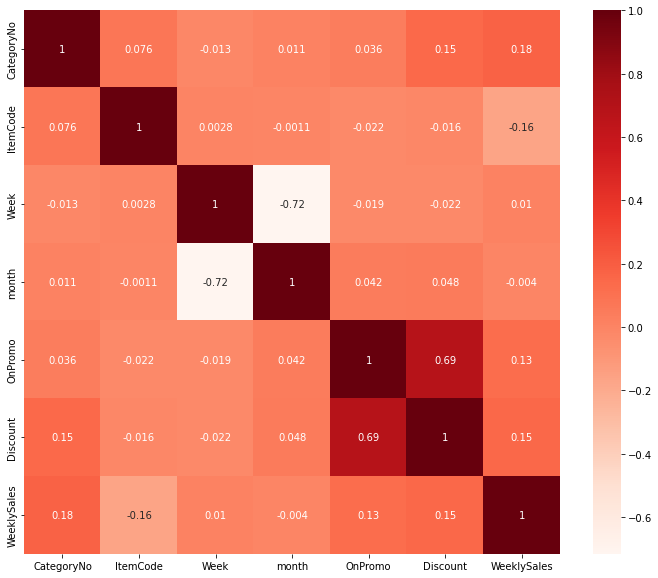

In [59]:
import seaborn as sns
plt.figure(figsize=(12,10))
cor = tra_result.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [159]:
X_train=tra_result[['CategoryNo','ItemCode','month','Discount','OnPromo']]
y_train=tra_result['WeeklySales']

In [160]:
X_val=validation[['CategoryNo','ItemCode','month','Discount','OnPromo']]
y_val=validation['WeeklySales']

In [75]:
import xgboost as xgb

xgbr = xgb.XGBRegressor(n_estimators=1000,objective='reg:squarederror')

xgbr.fit(X_train, y_train)
ypred = np.round(xgbr.predict(X_val))


In [76]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_val,ypred)

0.7791969060079086

In [77]:
(abs(ypred-y_val).sum())/(y_val.sum())

0.36771850615890467

In [65]:
d1 = pd.Series(ypred,name='PredictedSales')
df=pd.concat([y_val, d1], axis=1)
df

,WeeklySales,PredictedSales
0,9,15.0
1,15,8.0
2,7,6.0
3,25,18.0
4,24,53.0
...,...,...
368,52,51.0
369,20,15.0
370,12,10.0
371,8,8.0


In [66]:
df1=df.loc[df['PredictedSales']<df['WeeklySales']]
df1

,WeeklySales,PredictedSales
1,15,8.0
2,7,6.0
3,25,18.0
5,74,14.0
6,67,46.0
...,...,...
367,28,13.0
368,52,51.0
369,20,15.0
370,12,10.0


In [67]:
(abs(df1['PredictedSales']-df1['WeeklySales']).sum())/(y_val.sum())

0.25680914756833684

In [78]:
(abs(df1['PredictedSales']-df1['WeeklySales']).sum())/(df1['WeeklySales'].sum())

0.3374169836868915

In [161]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error
 
 # create regressor object



regressor = RandomForestRegressor(n_estimators = 10, random_state = 780)
 
 
regressor.fit(X_train, y_train) 
ypred = np.round(regressor.predict(X_val))
print(mean_absolute_percentage_error(y_val,ypred))

0.6141817606915886


In [162]:
(abs(ypred-y_val).sum())/(y_val.sum())

0.3797909407665505

In [165]:
(abs(df1['PredictedSales']-df1['WeeklySales']).sum())/(y_val.sum())

0.2634833390587427

In [163]:
d1 = pd.Series(ypred,name='PredictedSales')
df=pd.concat([validation, d1], axis=1)
df

,CategoryNo,ItemCode,Week,month,OnPromo,Discount,WeeklySales,PredictedSales
0,2,1006090,21,2,0,0.0,9,18.0
1,2,1105009,21,2,0,0.0,15,9.0
2,2,1098502,23,3,0,0.0,7,6.0
3,1,1081321,23,3,0,0.0,25,20.0
4,4,1074823,21,2,0,0.0,24,14.0
...,...,...,...,...,...,...,...,...
368,2,40759,21,2,0,0.0,52,43.0
369,2,1006090,22,2,0,0.0,20,18.0
370,1,1090303,21,2,0,0.0,12,12.0
371,2,1090276,23,3,0,0.0,8,7.0


In [164]:
df1=df.loc[df['PredictedSales']<df['WeeklySales']]
df1

,CategoryNo,ItemCode,Week,month,OnPromo,Discount,WeeklySales,PredictedSales
1,2,1105009,21,2,0,0.0,15,9.0
2,2,1098502,23,3,0,0.0,7,6.0
3,1,1081321,23,3,0,0.0,25,20.0
4,4,1074823,21,2,0,0.0,24,14.0
5,1,17287,22,2,0,0.0,74,26.0
...,...,...,...,...,...,...,...,...
364,4,245581,22,2,0,0.0,206,142.0
367,2,124954,22,2,0,0.0,28,14.0
368,2,40759,21,2,0,0.0,52,43.0
369,2,1006090,22,2,0,0.0,20,18.0


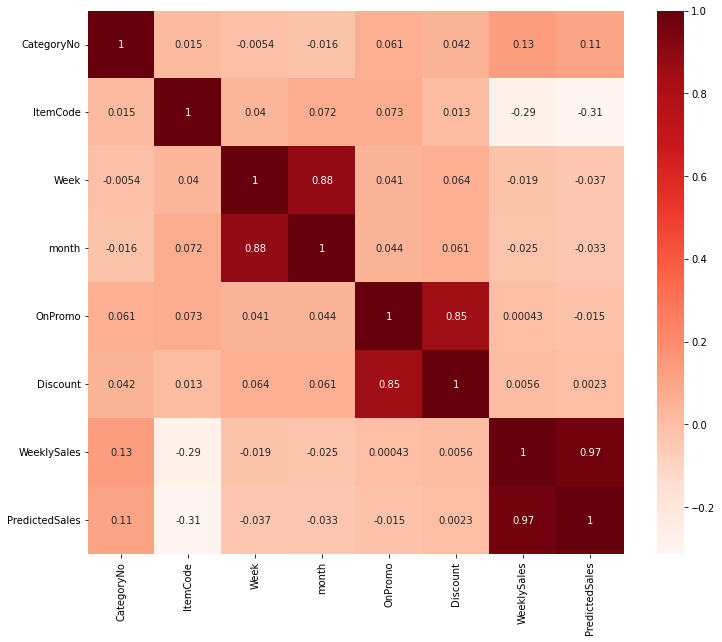

In [117]:
import seaborn as sns
plt.figure(figsize=(12,10))
cor = df1.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [102]:
d1 = df1[df1.OnPromo==1]
d0 = df1[df1.OnPromo==0]

In [104]:
d0.count()

CategoryNo        206
ItemCode          206
Week              206
month             206
OnPromo           206
Discount          206
WeeklySales       206
PredictedSales    206
dtype: int64

In [116]:
d1['Discount'].unique

<bound method Series.unique of 64     14.00
75      6.75
152     6.70
172     6.75
180     8.00
245     7.00
288    14.00
360    28.00
Name: Discount, dtype: float64>

No handles with labels found to put in legend.


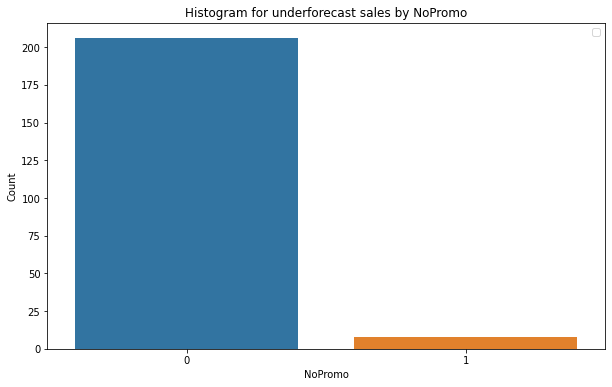

In [114]:
plt.figure(figsize=(10, 6))

sns.barplot(x=[0,1],y=[206,8])

plt.title("Histogram for underforecast sales by NoPromo")
plt.xlabel('NoPromo')
plt.ylabel('Count')
plt.legend()


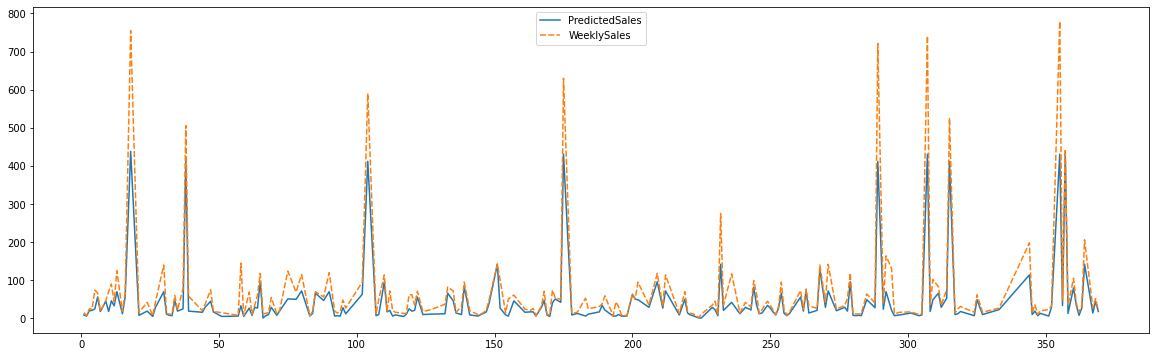

In [133]:

plt.figure(figsize=(20, 6))
sns.lineplot(data=df1[['PredictedSales','WeeklySales']])

In [134]:
test_df

,CategoryCode,ItemCode,Week,OnPromo,PredictedSales
0,category_1,1048975,w4,0,NaN
1,category_1,43738,w4,0,NaN
2,category_2,1044502,w1,0,NaN
3,category_2,913561,w4,0,NaN
4,category_2,216151,w4,0,NaN
...,...,...,...,...,...
372,category_2,20824,w3,0,NaN
373,category_2,130993,w3,1,NaN
374,category_1,35449,w4,0,NaN
375,category_2,1010068,w1,0,NaN


In [135]:
test_df['CategoryNo']=test_df['CategoryCode'].map({'category_1':1,'category_2': 2,'category_3':3,'category_4':4})
test_df['WeekNo']=test_df['Week'].map({'w1':1,'w2': 2,'w3':3,'w4':4})
test_df

,CategoryCode,ItemCode,Week,OnPromo,PredictedSales,CategoryNo,WeekNo
0,category_1,1048975,w4,0,NaN,1,4
1,category_1,43738,w4,0,NaN,1,4
2,category_2,1044502,w1,0,NaN,2,1
3,category_2,913561,w4,0,NaN,2,4
4,category_2,216151,w4,0,NaN,2,4
...,...,...,...,...,...,...,...
372,category_2,20824,w3,0,NaN,2,3
373,category_2,130993,w3,1,NaN,2,3
374,category_1,35449,w4,0,NaN,1,4
375,category_2,1010068,w1,0,NaN,2,1


In [136]:
s_date=datetime.strptime('10/01/2021', '%m/%d/%Y')
s_date=s_date.date()

i_date=datetime.strptime('02/18/2022', '%m/%d/%Y')
i_date.date()

da=((i_date.date()-s_date).days)//7
da=da+1

In [137]:
da

21

In [138]:
test_df['Week'] = test_df.apply (lambda row: countweek(row), axis=1)
test_df

,CategoryCode,ItemCode,Week,OnPromo,PredictedSales,CategoryNo,WeekNo
0,category_1,1048975,24,0,NaN,1,4
1,category_1,43738,24,0,NaN,1,4
2,category_2,1044502,21,0,NaN,2,1
3,category_2,913561,24,0,NaN,2,4
4,category_2,216151,24,0,NaN,2,4
...,...,...,...,...,...,...,...
372,category_2,20824,23,0,NaN,2,3
373,category_2,130993,23,1,NaN,2,3
374,category_1,35449,24,0,NaN,1,4
375,category_2,1010068,21,0,NaN,2,1


In [139]:
test_result=pd.merge(test_df,promotion_df, how="left", on=["ItemCode", "Week"])

In [141]:
test_result.loc[test_result['OnPromo']==1]

,CategoryCode,ItemCode,Week,OnPromo,PredictedSales,CategoryNo,WeekNo,PromotionStartDate,PromotionEndDate,DiscountValue,DiscountType,SellingPrice,PromotionStart,PromotionEnd
20,category_3,1064572,22,1,NaN,3,2,2/25/2022,3/3/2022,10.0,Percentage,370.0,2022-02-25,2022-03-03
37,category_2,1076929,21,1,NaN,2,1,2/18/2022,2/24/2022,10.0,Percentage,280.0,2022-02-18,2022-02-24
38,category_2,1010068,23,1,NaN,2,3,3/4/2022,3/10/2022,10.0,Percentage,170.0,2022-03-04,2022-03-10
58,category_2,87559,22,1,NaN,2,2,2/25/2022,3/3/2022,10.0,Percentage,140.0,2022-02-25,2022-03-03
109,category_2,130993,21,1,NaN,2,1,2/18/2022,2/24/2022,10.0,Percentage,70.0,2022-02-18,2022-02-24
110,category_2,836152,21,1,NaN,2,1,2/18/2022,2/24/2022,10.0,Percentage,70.0,2022-02-18,2022-02-24
118,category_2,20824,24,1,NaN,2,4,3/11/2022,3/17/2022,10.0,Percentage,80.0,2022-03-11,2022-03-17
127,category_2,1071124,22,1,NaN,2,2,2/25/2022,3/3/2022,10.0,Percentage,63.0,2022-02-25,2022-03-03
130,category_2,130993,22,1,NaN,2,2,2/25/2022,3/3/2022,10.0,Percentage,70.0,2022-02-25,2022-03-03
149,category_1,1048975,21,1,NaN,1,1,2/18/2022,2/24/2022,10.0,Percentage,70.0,2022-02-18,2022-02-24


In [142]:
test_result.drop(['PromotionStartDate','PromotionEndDate'],axis=1,inplace=True)
test_result[['DiscountValue','DiscountType','SellingPrice']]=test_result[['DiscountValue','DiscountType','SellingPrice']].replace(np.NaN,0)
test_result[['PromotionStart','PromotionEnd']]=test_result[['PromotionStart','PromotionEnd']].replace(np.NaN,0)

In [143]:
test_result['Discount'] = test_result.apply (lambda row: calculateDiscount(row), axis=1)

In [144]:
test_result.loc[test_result['OnPromo']==1]

,CategoryCode,ItemCode,Week,OnPromo,PredictedSales,CategoryNo,WeekNo,DiscountValue,DiscountType,SellingPrice,PromotionStart,PromotionEnd,Discount
20,category_3,1064572,22,1,NaN,3,2,10.0,Percentage,370.0,2022-02-25 00:00:00,2022-03-03 00:00:00,37.0
37,category_2,1076929,21,1,NaN,2,1,10.0,Percentage,280.0,2022-02-18 00:00:00,2022-02-24 00:00:00,28.0
38,category_2,1010068,23,1,NaN,2,3,10.0,Percentage,170.0,2022-03-04 00:00:00,2022-03-10 00:00:00,17.0
58,category_2,87559,22,1,NaN,2,2,10.0,Percentage,140.0,2022-02-25 00:00:00,2022-03-03 00:00:00,14.0
109,category_2,130993,21,1,NaN,2,1,10.0,Percentage,70.0,2022-02-18 00:00:00,2022-02-24 00:00:00,7.0
110,category_2,836152,21,1,NaN,2,1,10.0,Percentage,70.0,2022-02-18 00:00:00,2022-02-24 00:00:00,7.0
118,category_2,20824,24,1,NaN,2,4,10.0,Percentage,80.0,2022-03-11 00:00:00,2022-03-17 00:00:00,8.0
127,category_2,1071124,22,1,NaN,2,2,10.0,Percentage,63.0,2022-02-25 00:00:00,2022-03-03 00:00:00,6.3
130,category_2,130993,22,1,NaN,2,2,10.0,Percentage,70.0,2022-02-25 00:00:00,2022-03-03 00:00:00,7.0
149,category_1,1048975,21,1,NaN,1,1,10.0,Percentage,70.0,2022-02-18 00:00:00,2022-02-24 00:00:00,7.0


In [145]:
scale_mapper2 = {1:2, 2:2, 3:3,4:3}
test_result["month"] = test_result["WeekNo"].map(scale_mapper2)
test_result

,CategoryCode,ItemCode,Week,OnPromo,PredictedSales,CategoryNo,WeekNo,DiscountValue,DiscountType,SellingPrice,PromotionStart,PromotionEnd,Discount,month
0,category_1,1048975,24,0,NaN,1,4,0.0,0,0.0,0,0,0.0,3
1,category_1,43738,24,0,NaN,1,4,0.0,0,0.0,0,0,0.0,3
2,category_2,1044502,21,0,NaN,2,1,0.0,0,0.0,0,0,0.0,2
3,category_2,913561,24,0,NaN,2,4,0.0,0,0.0,0,0,0.0,3
4,category_2,216151,24,0,NaN,2,4,0.0,0,0.0,0,0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,category_2,20824,23,0,NaN,2,3,0.0,0,0.0,0,0,0.0,3
373,category_2,130993,23,1,NaN,2,3,10.0,Percentage,70.0,2022-03-04 00:00:00,2022-03-10 00:00:00,7.0,3
374,category_1,35449,24,0,NaN,1,4,0.0,0,0.0,0,0,0.0,3
375,category_2,1010068,21,0,NaN,2,1,0.0,0,0.0,0,0,0.0,2


In [166]:
X_test=test_result[['CategoryNo','ItemCode','month','Discount','OnPromo']]

In [167]:
X_test

,CategoryNo,ItemCode,month,Discount,OnPromo
0,1,1048975,3,0.0,0
1,1,43738,3,0.0,0
2,2,1044502,2,0.0,0
3,2,913561,3,0.0,0
4,2,216151,3,0.0,0
...,...,...,...,...,...
372,2,20824,3,0.0,0
373,2,130993,3,7.0,1
374,1,35449,3,0.0,0
375,2,1010068,2,0.0,0


In [168]:
y_test= np.round(regressor.predict(X_test))

In [153]:
test_df.drop('PredictedSales',axis=1,inplace=)

,CategoryCode,ItemCode,Week,OnPromo,PredictedSales,CategoryNo,WeekNo
0,category_1,1048975,24,0,NaN,1,4
1,category_1,43738,24,0,NaN,1,4
2,category_2,1044502,21,0,NaN,2,1
3,category_2,913561,24,0,NaN,2,4
4,category_2,216151,24,0,NaN,2,4
...,...,...,...,...,...,...,...
372,category_2,20824,23,0,NaN,2,3
373,category_2,130993,23,1,NaN,2,3
374,category_1,35449,24,0,NaN,1,4
375,category_2,1010068,21,0,NaN,2,1


In [150]:
d1 = pd.Series(y_test,name='PredictedSales')
df=pd.concat([test_result, d1], axis=1)
df

,CategoryCode,ItemCode,Week,OnPromo,PredictedSales,CategoryNo,WeekNo,DiscountValue,DiscountType,SellingPrice,PromotionStart,PromotionEnd,Discount,month,PredictedSales
0,category_1,1048975,24,0,NaN,1,4,0.0,0,0.0,0,0,0.0,3,17.0
1,category_1,43738,24,0,NaN,1,4,0.0,0,0.0,0,0,0.0,3,22.0
2,category_2,1044502,21,0,NaN,2,1,0.0,0,0.0,0,0,0.0,2,15.0
3,category_2,913561,24,0,NaN,2,4,0.0,0,0.0,0,0,0.0,3,8.0
4,category_2,216151,24,0,NaN,2,4,0.0,0,0.0,0,0,0.0,3,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,category_2,20824,23,0,NaN,2,3,0.0,0,0.0,0,0,0.0,3,129.0
373,category_2,130993,23,1,NaN,2,3,10.0,Percentage,70.0,2022-03-04 00:00:00,2022-03-10 00:00:00,7.0,3,60.0
374,category_1,35449,24,0,NaN,1,4,0.0,0,0.0,0,0,0.0,3,20.0
375,category_2,1010068,21,0,NaN,2,1,0.0,0,0.0,0,0,0.0,2,9.0


In [ ]:
final=df1[['CategoryCode','ItemCode',]]

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 377 entries, 0 to 376
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CategoryCode    377 non-null    object 
 1   ItemCode        377 non-null    int64  
 2   Week            377 non-null    int64  
 3   OnPromo         377 non-null    int64  
 4   PredictedSales  0 non-null      float64
 5   CategoryNo      377 non-null    int64  
 6   WeekNo          377 non-null    int64  
 7   DiscountValue   377 non-null    float64
 8   DiscountType    377 non-null    object 
 9   SellingPrice    377 non-null    float64
 10  PromotionStart  377 non-null    object 
 11  PromotionEnd    377 non-null    object 
 12  Discount        377 non-null    float64
 13  month           377 non-null    int64  
 14  PredictedSales  377 non-null    float64
dtypes: float64(5), int64(6), object(4)
memory usage: 47.1+ KB


In [169]:
y_test

array([ 17.,  23.,  15.,   9.,  12.,  12.,   3.,  18.,  14.,  11.,  96.,
         8.,  18.,   8.,  12.,  19.,  31.,  17.,  16.,  19.,  52.,  31.,
        65.,   9.,  32.,  14.,   3.,  13.,  12.,  11.,  10.,  12.,   8.,
        20.,  18.,  65.,  11.,  12.,  63.,   9.,  14., 166.,  31.,  23.,
        14.,   9.,  10.,  12.,   6.,  26.,   6.,  14.,   8.,   6.,   6.,
        14.,  36.,  19., 144.,  74.,  76.,  46., 223.,  14.,  22.,  10.,
        31.,  11.,  10.,   8.,  17.,   8.,  11.,  96.,  25.,  14.,   9.,
        82.,  46.,  64.,  64.,  82.,   8.,  17., 125.,  15.,  11.,  74.,
        60.,  12.,  24.,   8., 223.,  10.,  31.,  11.,  19.,  12.,  14.,
        24.,  19.,  23.,  65.,  41.,  30.,  34.,  54.,   2.,  11.,  56.,
        64.,  64.,  57.,  10.,  24.,  12.,  31.,  11., 272.,  12.,   7.,
        22.,  19.,  28.,  50.,  12.,   3.,  15.,  18.,   7.,  56.,   6.,
        12.,  28.,   8.,  41.,  33.,   4.,  10.,  11.,   9.,  19.,   9.,
        19.,   9.,   9., 166.,   7.,  34.,  45.,  2

In [154]:
test_df=pd.read_csv('test_data.csv')

In [171]:
test_df

,CategoryCode,ItemCode,Week,OnPromo
0,category_1,1048975,w4,0
1,category_1,43738,w4,0
2,category_2,1044502,w1,0
3,category_2,913561,w4,0
4,category_2,216151,w4,0
...,...,...,...,...
372,category_2,20824,w3,0
373,category_2,130993,w3,1
374,category_1,35449,w4,0
375,category_2,1010068,w1,0


In [172]:
d1 = pd.Series(y_test,name='PredictedSales')
df=pd.concat([test_df, d1], axis=1)
df

,CategoryCode,ItemCode,Week,OnPromo,PredictedSales
0,category_1,1048975,w4,0,17.0
1,category_1,43738,w4,0,23.0
2,category_2,1044502,w1,0,15.0
3,category_2,913561,w4,0,9.0
4,category_2,216151,w4,0,12.0
...,...,...,...,...,...
372,category_2,20824,w3,0,130.0
373,category_2,130993,w3,1,56.0
374,category_1,35449,w4,0,19.0
375,category_2,1010068,w1,0,8.0


In [173]:
df.to_csv('submission1.csv',index=False)